# Source-sink pair

### Some mathematics 

Circulation:
\begin{equation}
\Gamma = \oint \mathbf{v}\cdot d\vec{l}
\end{equation}

By applying Stokes' theorem, circulation can be related to the vorticity quantity $\mathbf{\omega} = \nabla \times \mathbf{v}$, i.e.

\begin{equation}
\oint \mathbf{v}\cdot d\vec{l} = \int_S \mathbf{\omega} \cdot \vec{n} \,ds
\end{equation}

## Let's get started

In [65]:
import math
import numpy as np
from matplotlib import pyplot

In [66]:
N = 50

x_start = -2
x_end = 2

y_start = -1
y_end = 1

x = np.linspace(x_start, x_end, N)
y = np.linspace(y_start, y_end, N)

X, Y = np.meshgrid(x, y)

# print(X)
# print(Y)

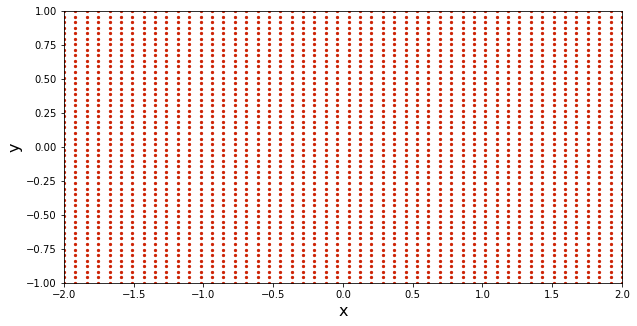

In [67]:
%matplotlib inline

width = 10.0
height = (y_end - y_start)/(x_end - x_start)*width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.scatter(X, Y, s=5, color='#CD2305', marker='o');

## Source flow

### Velocity field
$u_r(r, \theta) = \frac{\sigma}{2\pi r}, \qquad u_\theta (r, \theta) = 0$

In [68]:
sigma = 1
x_source = 0
y_source = 0

u_source = sigma/(2*math.pi)*(X - x_source)/((X - x_source)**2 + (Y - y_source)**2)
v_source = sigma/(2*math.pi)*(Y - y_source)/((X - x_source)**2 + (Y - y_source)**2)

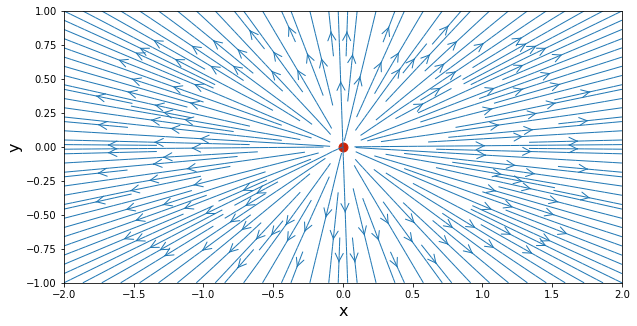

In [69]:
width = 10.0
height = (y_end - y_start)/(x_end - x_start)*width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u_source, v_source, density=2, linewidth=1, 
                  arrowsize=2, arrowstyle='->')
pyplot.scatter(x_source, y_source, s=80, color='#CD2305', marker='o');

### Challenge question
What is the total mass flux outwards of a small closed surface around the source?

The total mass flux outwards e.g. of a circle of radius $R$ centered at the same point than the source is

\begin{equation}
\int_0^{2\pi} \int_0^R u_r\, dr\,d\theta = \sigma
\end{equation}

## Sink flow

In a source flow the strength $\sigma$ results to be positive. However, in a sink, it is conversely negative, so the velocity plot looks like the previous one but with the velocity vectors pointing inwards. On the other had, the location of the sink was changed to be located at (1,0), i.e.

In [70]:
sigma = -1
x_sink = 1
y_sink = 0

u_sink = sigma/(2*math.pi)*(X - x_sink)/((X - x_sink)**2 + (Y - y_sink)**2)
v_sink = sigma/(2*math.pi)*(Y - y_sink)/((X - x_sink)**2 + (Y - y_sink)**2)

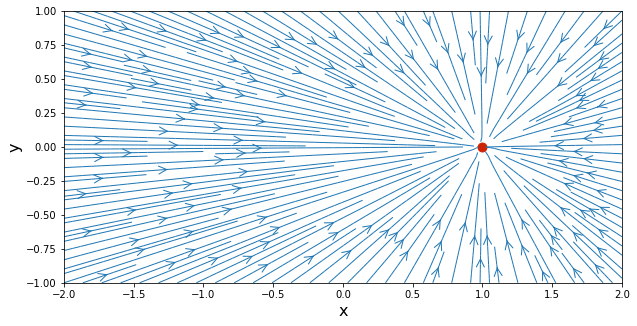

In [71]:
width = 10.0
height = (y_end - y_start)/(x_end - x_start)*width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u_sink, v_sink, density=2, linewidth=1, 
                  arrowsize=2, arrowstyle='->')
pyplot.scatter(x_sink, y_sink, s=80, color='#CD2305', marker='o');

## Source-sink pair

Now let's get both flows combined!

In [72]:
u_pair = u_source + u_sink
v_pair = v_source + v_sink

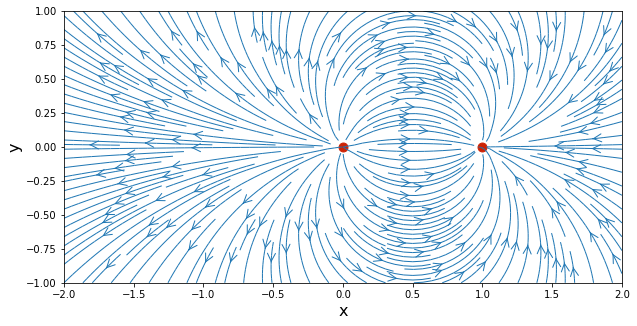

In [73]:
width = 10.0
height = (y_end - y_start)/(x_end - x_start)*width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u_pair, v_pair, density=2, linewidth=1, 
                  arrowsize=2, arrowstyle='->')
pyplot.scatter([x_source, x_sink], [y_source, y_sink],
               s=80, color='#CD2305', marker='o');

### Challenge task

Write your own code for plotting the potential lines, instead of the stream lines. You might want to use the contour() function for this.

In [74]:
phi_source = sigma/(2*math.pi)*np.log(np.sqrt((X - x_source)**2 + (Y - y_source)**2))

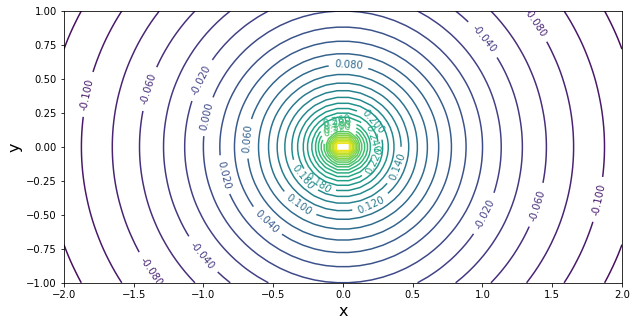

In [75]:
width = 10.0
height = (y_end - y_start)/(x_end - x_start)*width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
CS = pyplot.contour(X, Y, phi_source, 32);
pyplot.clabel(CS);
#pyplot.scatter([x_source, x_sink], [y_source, y_sink],
#               s=80, color='#CD2305', marker='o');

In [76]:
phi_sink = -sigma/(2*math.pi)*np.log(np.sqrt((X - x_sink)**2 + (Y - y_sink)**2))

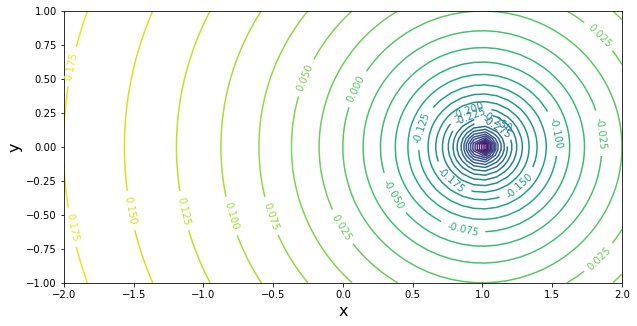

In [77]:
width = 10.0
height = (y_end - y_start)/(x_end - x_start)*width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
CS = pyplot.contour(X, Y, phi_sink, 32);
pyplot.clabel(CS);
#pyplot.scatter([x_source, x_sink], [y_source, y_sink],
#               s=80, color='#CD2305', marker='o');

In [78]:
phi = phi_sink + phi_source

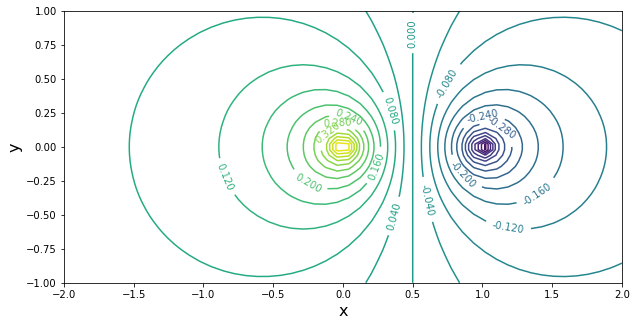

In [79]:
width = 10.0
height = (y_end - y_start)/(x_end - x_start)*width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
CS = pyplot.contour(X, Y, phi, 32);
pyplot.clabel(CS);
#pyplot.scatter([x_source, x_sink], [y_source, y_sink],
#               s=80, color='#CD2305', marker='o');

It can be recognized that the latter plot is a doublet!

In [80]:
from IPython.core.display import HTML
def css_styling(filepath):
    styles = open(filepath, 'r').read()
    return HTML(styles)
css_styling('../styles/custom.css')